#### Importing The Librabries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

#### Reading the Dataset

In [2]:
data=pd.read_csv('Sales_add.csv')

In [3]:
#checking whether the dataset uploaded sucessfully
data
#since there are only 22 rows we can check easily and ffind out that,there are no null values present 

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
data.describe()
#shows the brief description about the dataset

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [5]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [6]:
data['Region'].unique()

array(['Region - A', 'Region - B', 'Region - C'], dtype=object)

In [7]:
data['Manager'].unique()

array(['Manager - A', 'Manager - C', 'Manager - B'], dtype=object)

#### Two Sample T-test

In [8]:
from scipy.stats import ttest_ind


In [9]:
t_test1,p_value=ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])
t_test1,p_value

(-12.995084451110877, 2.614368006904645e-16)

In [10]:
if p_value<0.05:
    print('Null Hypothesis is Rejected')
else:
    print('Null hypothesis is accepted')
    

Null Hypothesis is Rejected


In [11]:
# Null hypothesis-Status Quo- Digital marketing has improved sales
# Alternate hypothesis-there is increase in sales after stepping into digital marketing

In [12]:
from scipy.stats import chi2_contingency

In [13]:
alpha=0.05
df_data=pd.crosstab(data['Manager'],data['Region'])

In [14]:
df_data

Region,Region - A,Region - B,Region - C
Manager,,,
Manager - A,4,4,1
Manager - B,3,1,3
Manager - C,3,2,1


<AxesSubplot:xlabel='Region', ylabel='Manager'>

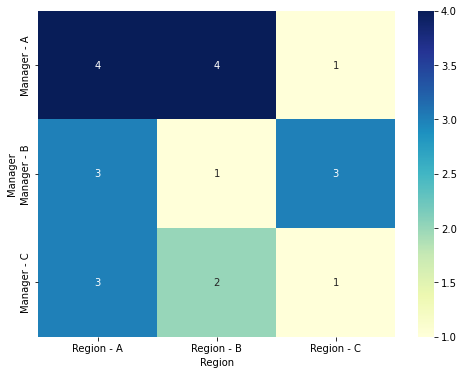

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df_data,annot=True,cmap='YlGnBu')

In [19]:
chi2_stat,p_value,dof,exp=chi2_contingency(df_data)

In [20]:
if p_value<0.05:
    print('Null Hypothesis is Rejected')
else:
    print('Null hypothesis is accepted')
    

Null hypothesis is accepted
